In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from scipy.optimize import curve_fit

In [82]:
c=3.0e8
#l_Cak
#l_CaH
#l_Ha

In [23]:
G = ['NGC 1357','NGC 1832','NGC 2276','NGC 2775','NGC 2903','NGC 3034','NGC 3147','NGC 3227','NGC 3245',\
'NGC 3310','NGC 3368','NGC 3471','NGC 3516','NGC 3623','NGC 3627','NGC 3941','NGC 4472','NGC 4631','NGC 4775',\
'NGC 5248','NGC 5548','NGC 5866','NGC 6181','NGC 6217','NGC 6643','NGC 6764','NGC 7469']

In [27]:
D=[0.925,0.893,0.891,1.228,3.545,3.163,1.123,1.558,0.801,1.019,2.350,0.458,0.498,3.051,2.702,1.024,1.692,\
  4.369,0.657,1.654,0.410,1.681,0.772,0.695,1.140,0.665,0.543]

In [28]:
l_CaK=[3961.4,3959.1,3962.9,3952.9,3937.4,3935.8,3966.8,3944.3,3947.4,3945.1,3944.3,3960.6,3968.4,3938.1,\
      3941.2,3944.3,3946.7,3934.3,3956.0,3943.6,4000.1,3941.2,3963.7,3948.2,3950.5,3958.3,3993.9]

In [32]:
l_CaH=[3996.2,3994.7,3997.0,3986.9,3972.2,3970.7,4001.7,3982.3,3983.1,3971.5,3980.0,3989.3,4000.9,3974.6,\
      3976.9,3979.2,3974.6,3973.8,3989.3,3980.7,4037.3,3970.7,3997.8,3984.6,3985.4,3997.8,4033.4]

In [34]:
l_Ha=[6606.7,6605.1,6614.1,6590.4,6574.2,6562.5,6620.6,6585.0,6609.8,6578.0,6581.9,6609.0,6605.9,6578.0,\
     6577.3,6601.3,6612.1,6575.7,6591.1,6584.2,6673.3,6594.3,6609.0,6588.9,6592.0,6609.0,6660.9]

In [41]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
           dtype='int64')

In [53]:
data={'Galaxy':Galaxies,'D':D,'$\lambda _{CaK}$':l_CaK,'$\lambda _{CaH}$':l_CaH,'$\lambda _{Ha}$':l_Ha}
df=pd.DataFrame(data)
df=df.set_index('Galaxy')
#df

In [67]:
df['$(\Delta \lambda /\lambda )_{CaK}$']=(df['$\lambda _{CaK}$']-3932.7)/3932.7
df['$(\Delta \lambda /\lambda )_{CaH}$']=(df['$\lambda _{CaH}$']-3967.6)/3967.6
df['$(\Delta \lambda /\lambda )_{Ha}$']=(df['$\lambda _{Ha}$']-6561.0)/6561.0

In [80]:
#df=df.drop('$(\x0crac{\\Delta \\lambda}{\\lambda} )_{CaK}$',1)
#df=df.rename(columns={'$(\Delta \lambda /\lambda )_{CaH}$':'z_cah'})
#df=df.rename(columns={'$(\Delta \lambda /\lambda )_{Ha}$':'z_ha'})

In [85]:
df['Distance']=22.0/df['D']

In [87]:
df['V_cak']=c*df.z_cak
df['V_cah']=c*df.z_cah
df['V_ha']=c*df.z_ha

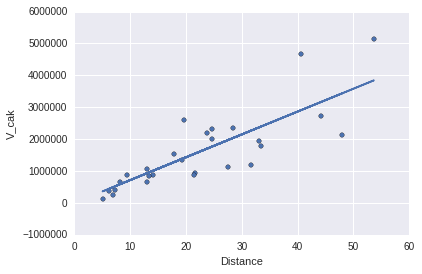

In [122]:
df.plot.scatter('Distance','V_cak')
plt.plot(df.Distance,p1*df.Distance)

In [100]:
def HubbleLaw(x,a):
    return a*x

In [109]:
p1,pc1=curve_fit(HubbleLaw,df.Distance,df.V_cak)
p2,pc2=curve_fit(HubbleLaw,df.Distance,df.V_cah)
p3,pc3=curve_fit(HubbleLaw,df.Distance,df.V_ha)

In [120]:
np.max(np.sqrt([pc1,pc2,pc3]))

5954.7404804143871

In [117]:
np.mean([p1,p2,p3])

72086.487038796258

In [121]:
#pd.scatter_matrix(df,alpha=0.7, figsize=(20, 20), diagonal='kde')